<a href="https://colab.research.google.com/github/arandapablodamian/DSI_Entregable/blob/main/ProyectoDS_Parte_%7C%7C%2BAranda%2CPablo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto de Data scientist: Analisis de Datos del datasets de la plataforma de valoraciones de peliculas de TMDB**

---

**Descripción**
Este proyecto tiene como objetivo realizar un análisis de datos del conjunto "Dataset-TMDB". Se llevara a cabo un estudio de las diferentes metricas que recopiladas para cada pelicula, con el objetivo de establecer cuales con los parametros y factores mas importantes que influyen en el exito de una pelicula.

---

**Preguntas e hipotesis del dataset elegido**

El objetivo principal de este proyecto es desarrollar un modelo predictivo para identificar que metricas y caracteristicas de una pelicula son las que inciden con mayor probabilidad en el exito, reflejado en este caso por las valoraciones positivas de un usuario. Algunas preguntas especificas que se buscan responder son:


*   ¿Cuales son las principales caracteristicas que influyen en el exito de la pelicula?
  **Hipotesis nula:** Las principales caracteristicas que influyen en el exito de la pelicula son el presupuesto y los actores.
  **Hipotesis alternativa**: Las principales caracteristicas que influyen en el exito de la pelicula NO son el presupuesto y los actores.
*   ¿Cuales son las principales caracteristicas que influyen en el fracaso de la pelicula?
  **Hipotesis nula:** Las principales caracteristicas que influyen en el fracaso de la pelicula son el presupuesto y los actores.
  **Hipotesis alternativa**: Las principales caracteristicas que influyen en el fracaso de la pelicula NO son el presupuesto y los actores.
*   ¿Es posible establecer una relacion entre los votos,reviews y recomendaciones?
  **Hipotesis nula:** Entre mayor cantidad de votos y reviews positivas es mayor la cantidad de recomendaciones positivas de la pelicula.
  **Hipotesis alternativa**: Entre mayor cantidad de votos y reviews positivas NO implica que sea mayor la cantidad de recomendaciones positivas de la pelicula.
*   ¿Existe una relacion directa entre las diferentes metricas?
  **Hipotesis nula:** Existe una relacion directa de las metricas del presupuesto, popularidad, lenguaje , actores, estudios de las peliculas y votos positivos.
  **Hipotesis alternativa**:  NO existe una relación directa de las metricas del presupuesto, popularidad, lenguaje , actores, estudios de las peliculas y votos positivos.




In [2]:
#Importamos las librerias correspondientes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive
import os
drive.mount('/content/gdrive/')


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [91]:
#Importamos el dataset
%cd 'gdrive/MyDrive/data-scientist-1/entregable/segunda-entrega/'

[Errno 2] No such file or directory: 'gdrive/MyDrive/data-scientist-1/entregable/segunda-entrega/'
/content/gdrive/MyDrive/data-scientist-1/entregable/primera-entrega


In [4]:
df= pd.read_csv('Dataset-TMDB.csv')


In [5]:
#Estructura del dataset

In [6]:
df.head()


,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,823464,Godzilla x Kong: The New Empire,Science Fiction-Action-Adventure,en,Following their explosive showdown Godzilla an...,10484.676,Legendary Pictures-Warner Bros. Pictures,2024-03-27,150000000.0,558503759.0,115.0,Released,Rise together or fall alone.,7.246,1878.0,Rebecca Hall-Brian Tyree Henry-Dan Stevens-Kay...,giant monster-sequel-dinosaur-kaiju-fantasy wo...,/v4uvGFAkKuYfyKLGZnYj6l47ERQ.jpg,/j3Z3XktmWB1VhsS8iXNcrR86PXi.jpg,1011985-1275232-359410-601796-967847-653346-69...
1,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
2,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...
4,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,683813734.0,167.0,Released,Long live the fighters.,8.300,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,epic-based on novel or book-fight-sandstorm-sa...,/czembW0Rk1Ke7lCJGahbOhdCuhV.jpg,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,438631-763215-792307-1011985-467244-634492-359...


# Descripción general del Dataset


In [7]:
#Dimensiones del dataset
df.shape

(722400, 20)

In [8]:
#Nombres de las columnas
df.columns

Index(['id', 'title', 'genres', 'original_language', 'overview', 'popularity',
       'production_companies', 'release_date', 'budget', 'revenue', 'runtime',
       'status', 'tagline', 'vote_average', 'vote_count', 'credits',
       'keywords', 'poster_path', 'backdrop_path', 'recommendations'],
      dtype='object')

In [9]:
#Tipos de datos de cada columna
df.dtypes

,0
id,int64
title,object
genres,object
original_language,object
overview,object
popularity,float64
production_companies,object
release_date,object
budget,float64
revenue,float64


In [10]:
#Valores unicos
for col in df.select_dtypes(include=['object']).columns:
    print(df[col].value_counts())

title
Home                          106
Alone                          76
Mother                         66
Untitled                       63
Carmen                         62
                             ... 
Lonely Souls                    1
My Soul Is Slashed              1
Fluorescent Adolescent          1
El Alambrista: La Venganza      1
Wild Playgirls                  1
Name: count, Length: 575329, dtype: int64
genres
Documentary                                         95069
Drama                                               80108
Comedy                                              46883
Animation                                           22312
Music                                               17930
                                                    ...  
Comedy-Family-Animation-Fantasy                         1
Drama-Action-Thriller-Crime-Horror                      1
Family-Animation-Comedy-Music-TV Movie                  1
Fantasy-Mystery-Horror-History                   

In [11]:
#Existencias de valores faltantes
print("\nValores faltantes: \n", df.isnull().sum())


Valores faltantes: 
 id                           0
title                        6
genres                  210411
original_language            0
overview                118300
popularity                   0
production_companies    385077
release_date             51722
budget                       0
revenue                      0
runtime                  34354
status                       0
tagline                 614010
vote_average                 0
vote_count                   0
credits                 224791
keywords                511858
poster_path             184631
backdrop_path           499353
recommendations         686917
dtype: int64


In [12]:
#Estadisticas variables numericas
df.describe(include=[np.number])

,id,popularity,budget,revenue,runtime,vote_average,vote_count
count,722400.000000,722400.000000,7.224000e+05,7.224000e+05,6.880460e+05,722400.000000,722400.000000
mean,526918.346672,1.900667,4.021627e+05,9.998190e+05,1.990585e+02,2.445947,28.297162
std,253193.685553,24.875702,8.212554e+06,2.036666e+07,8.583858e+04,3.176365,393.418041
min,2.000000,0.000000,0.000000e+00,-1.200000e+01,0.000000e+00,0.000000,0.000000
25%,328916.750000,0.600000,0.000000e+00,0.000000e+00,5.000000e+00,0.000000,0.000000
50%,533353.500000,0.600000,0.000000e+00,0.000000e+00,5.000000e+01,0.000000,0.000000
75%,737855.250000,1.301000,0.000000e+00,0.000000e+00,9.000000e+01,5.600000,2.000000
max,968161.000000,10484.676000,5.000000e+09,2.920357e+09,5.050505e+07,10.000000,33262.000000


# Descripción de variables


*   id: identificador univoco de la pelicula dentro del dataset
*   title: Titulo de la pelicula
*   genres: Genero de la pelicula
*   original_language: idioma original en la que fue producida la pelicula
*   overview: breve introduccion de la pelicula
*   popularity: metrica de subjetiva, segun la TMDB, se calcula teniendo en cuenta los votos de los usuarios en el sitio y metricas financieras como presupuesto de produccion  vote data and financial metrics
*   production_companies: Compañia encargada de la produccion de la pelicula.
*   release_date: fecha de estreno
*   budget: presupuesto de realizacion de la pelicula, incluyendo gastos de produccion, marketing, actores directores y demas (en dolares)
*   revenue: ganancia total obtenida luego del estreno de la pelicula tanto en cines como en plataformas (en dolares)
*   runtime: duracion en minutos de la pelicula.
*   status: estado de la pelicula.
*   tagline: Frase que acompaña al titulo de la pelicula.
*   vote_average: Promedio de puntuación de votos de la pelicula.
*   vote_count: Cantidad de votos que se realizaron.
*   credits: personas como actores , productores y demas personas que integran la pelicula.
*   keywords: palabras claves de la pelicula utilizadas en el buscador.
*   poster_path: ruta de la imagen del poster de la pelicula utilizado en el sitio.
*   backdrop_path: ruta de la imagen de fondo utilizada en la descripcion de la pelicula en el sitio TMDB
*   recommendations: id de peliculas separadas por '-' recomendadas por el sitio en funciona de la pelicula actual.



In [13]:
#Quitamos columnas que no utilizamos o que no aportan valor al objetivo del analisis
#Removemos las columnas de poster_path y backdrop_path

columns_to_drop = ['poster_path', 'backdrop_path']
df = df.drop(columns=columns_to_drop)

#convertimos el campo release_date a tipo datetime
df['release_date'] = pd.to_datetime(df['release_date'])

#runtime nulos los reemplazamos por la media para analisis
media_runtime = df['runtime'].mean()

# Reemplaza los valores nulos con la media
df['runtime'].fillna(media_runtime, inplace=True)


In [14]:
df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,recommendations
0,823464,Godzilla x Kong: The New Empire,Science Fiction-Action-Adventure,en,Following their explosive showdown Godzilla an...,10484.676,Legendary Pictures-Warner Bros. Pictures,2024-03-27,150000000.0,558503759.0,115.0,Released,Rise together or fall alone.,7.246,1878.0,Rebecca Hall-Brian Tyree Henry-Dan Stevens-Kay...,giant monster-sequel-dinosaur-kaiju-fantasy wo...,1011985-1275232-359410-601796-967847-653346-69...
1,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,1006462-298618-569094-1061181-346698-1076487-6...
2,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,713704-296271-502356-1076605-1084225-1008005-9...
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,496450-569094-298618-385687-877100-598331-4628...
4,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,683813734.0,167.0,Released,Long live the fighters.,8.300,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,epic-based on novel or book-fight-sandstorm-sa...,438631-763215-792307-1011985-467244-634492-359...


# Graficos en Matplotlib



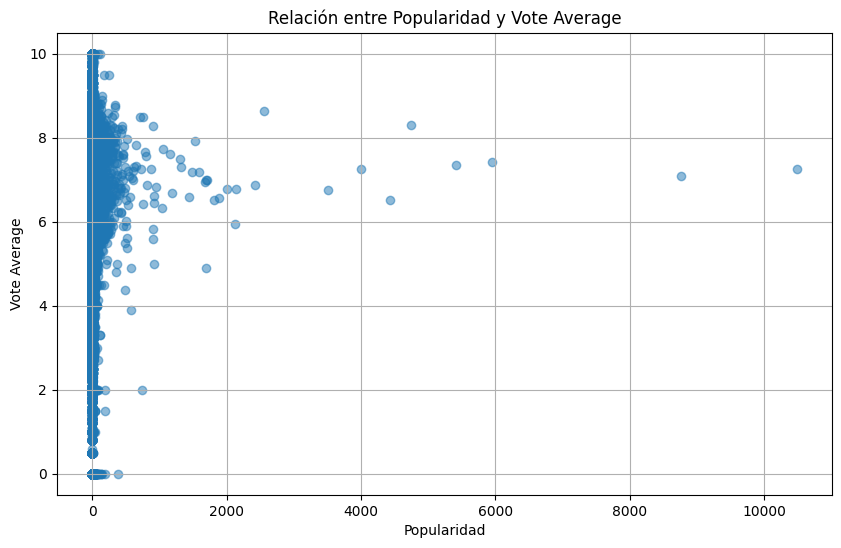

In [15]:

# Gráfico de dispersión de 'popularity' vs 'vote_average'

# Filtrar el DataFrame para incluir solo los idiomas especificados
idiomas_especificos = ['en', 'fr', 'es', 'de', 'ja']
df = df[df['original_language'].isin(idiomas_especificos)]


plt.figure(figsize=(10, 6))
plt.scatter(df['popularity'], df['vote_average'], alpha=0.5)
plt.title('Relación entre Popularidad y Vote Average')
plt.xlabel('Popularidad')
plt.ylabel('Vote Average')
plt.grid(True)
plt.show()

Como primer paso filtramos por los idiomas principales que poseen la mayor cantidad de registros para evitar sesgos en las valoraciones con respecto a la cantidad de votos, que para ciertos idiomas son pocos votos y mas especificos del pais de origen de la pelicula.

En el gráfico anterior podemos observar que las valoraciones de la peliculas no tiene una relación tan fuerte con el parametro de la popularidad, esto se puede deber a que ciertas peliculas de culto con financiación y producción más reducido pueden tener una valoracion alta para un público específico, a excepción de algunas peliculas.

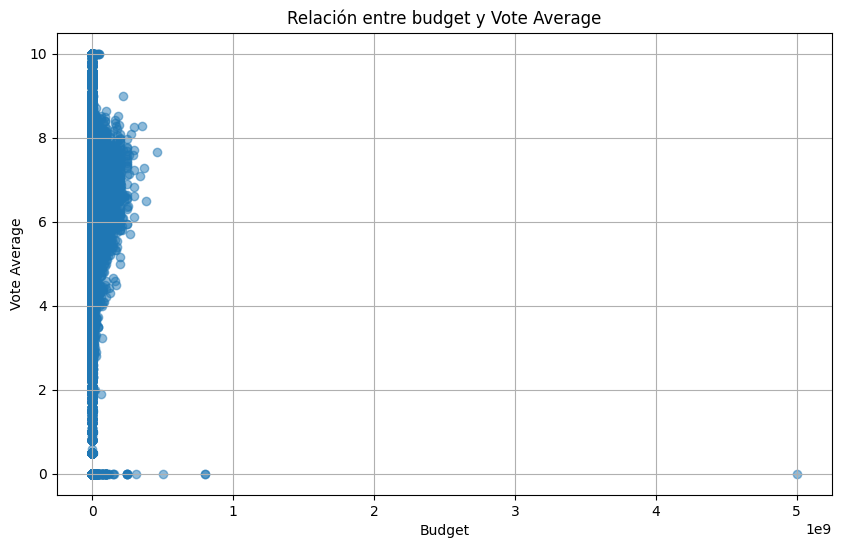

In [16]:
# Gráfico de dispersión de 'budget' vs 'vote_average'
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['vote_average'], alpha=0.5)
plt.title('Relación entre budget y Vote Average')
plt.xlabel('Budget')
plt.ylabel('Vote Average')
plt.grid(True)
plt.show()

En el gráfico anterior podemos observar que las valoraciones de la peliculas no tiene una relación tan fuerte con el parametro del presupuesto de la pelicula, similar a la metrica de la popularidad del gráfico anterior, esto se puede deber a que ciertas peliculas de culto con financiación y producción más reducido pueden tener una valoracion alta para un público específico.

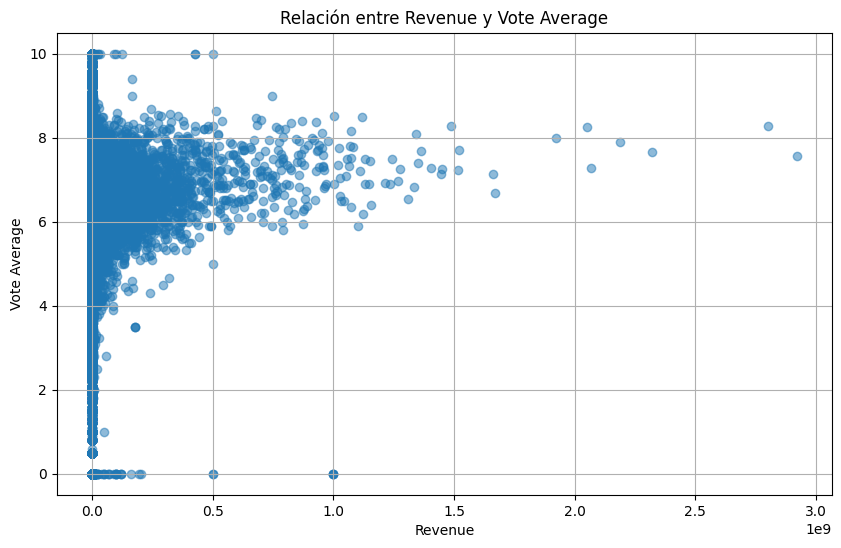

In [17]:

# Gráfico de dispersión de 'revenue' vs 'vote_average'
plt.figure(figsize=(10, 6))
plt.scatter(df['revenue'], df['vote_average'], alpha=0.5)
plt.title('Relación entre Revenue y Vote Average')
plt.xlabel('Revenue')
plt.ylabel('Vote Average')
plt.grid(True)
plt.show()

En el gráfico anterior podemos observar que las valoraciones de la peliculas tienen una relación directa con el beneficio monetario (revenue) de la pelicula, en cuanto mayor valoración positiva mayor es el retorno de inversión obtenida por la pelicula, por lo cual es más redituable.


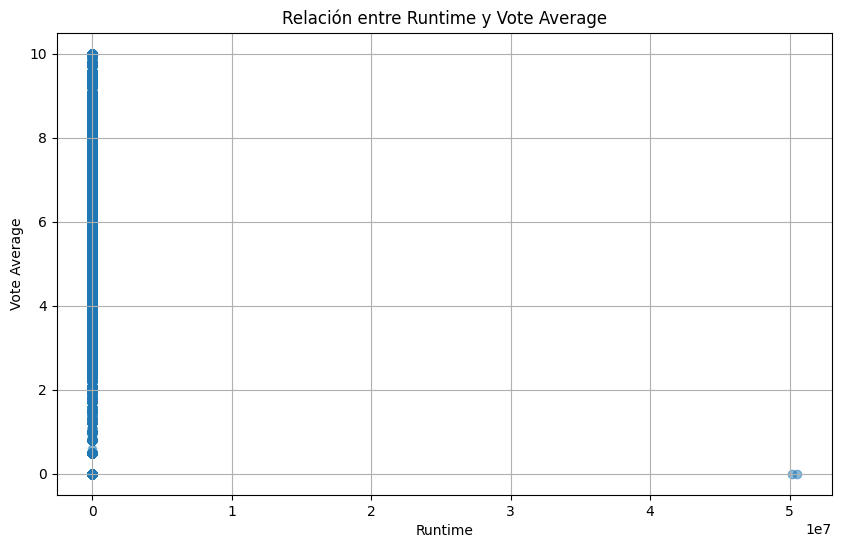

In [18]:
# Gráfico de dispersión de 'runtime' vs 'vote_average'
plt.figure(figsize=(10, 6))
plt.scatter(df['runtime'], df['vote_average'], alpha=0.5)
plt.title('Relación entre Runtime y Vote Average')
plt.xlabel('Runtime')
plt.ylabel('Vote Average')
plt.grid(True)
plt.show()

En el gráfico anterior podemos observar que las valoraciones de la peliculas no tiene una relación alguna con la duración de la pelicula (runtime).

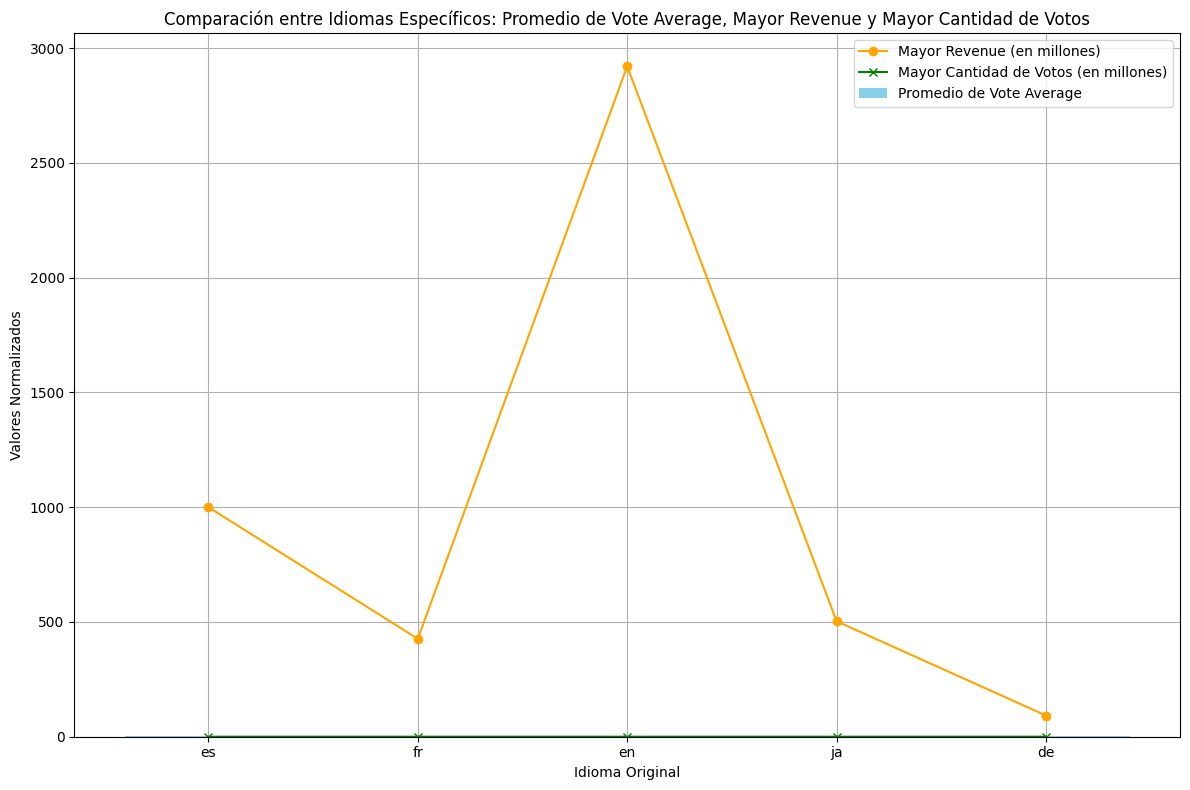

In [19]:
# Calcular el promedio de vote_average, el mayor revenue (en millones) y la mayor cantidad de votos (en millones) por idioma original
mean_vote_by_language = df.groupby('original_language').agg({
    'vote_average': 'mean',
    'revenue': 'max',
    'vote_count': 'max'
}).sort_values(by='vote_average', ascending=False)

# Graficar el gráfico de barras con tres variables: promedio de vote_average, revenue y vote_count
plt.figure(figsize=(12, 8))

# Barra para el promedio de vote_average
plt.bar(mean_vote_by_language.index, mean_vote_by_language['vote_average'], color='skyblue', label='Promedio de Vote Average')

# Línea para el mayor revenue
plt.plot(mean_vote_by_language.index, mean_vote_by_language['revenue'] / 1e6, marker='o', color='orange', label='Mayor Revenue (en millones)')

# Línea para la mayor cantidad de votos (vote_count)
plt.plot(mean_vote_by_language.index, mean_vote_by_language['vote_count'] / 1e6, marker='x', color='green', label='Mayor Cantidad de Votos (en millones)')

plt.title('Comparación entre Idiomas Específicos: Promedio de Vote Average, Mayor Revenue y Mayor Cantidad de Votos')
plt.xlabel('Idioma Original')
plt.ylabel('Valores Normalizados')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

En el gráfico anterior podemos observar que las valoraciones de la peliculas tienen relacion el idioma original de la pelicula, por amplia mayoria las peliculas en ingles y español poseen mejores valoraciones por amplio margen.


#Graficos en Seaborn

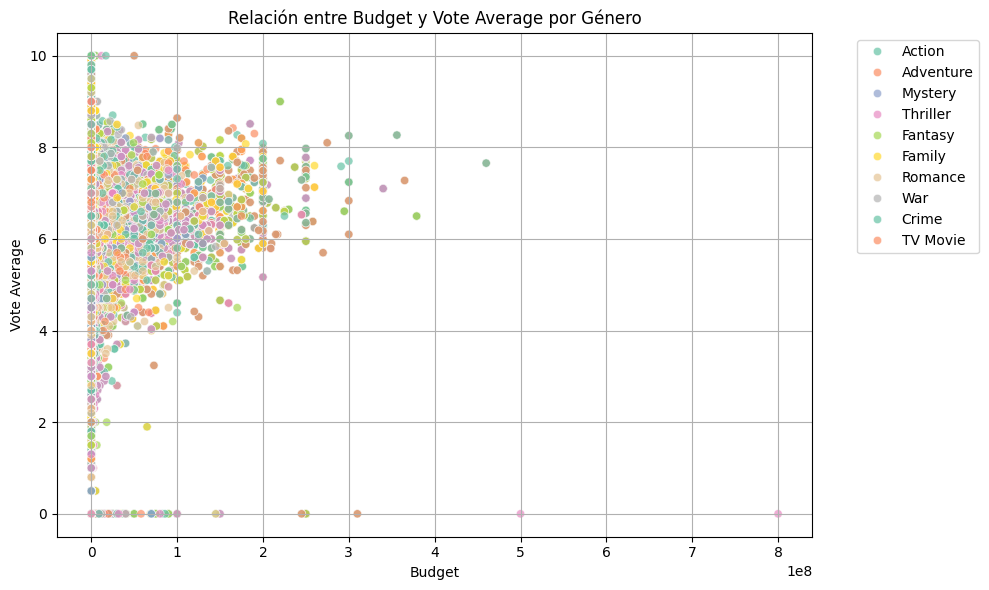

In [20]:

# Dividir las categorías de géneros en múltiples filas
genres_df = df['genres'].str.split('-', expand=True).stack().reset_index(level=1, drop=True).rename('genre')
df_genres = df.drop('genres', axis=1).join(genres_df)

# Eliminar filas con valores nulos en las columnas de interés
df_genres = df_genres.dropna(subset=['budget', 'revenue', 'vote_average'])

# para que sea mas entendible el grafico solo considero las 10 categorias con votaciones mas positivas
top_genres = df_genres.groupby('genre')['vote_average'].mean().nlargest(10).index
df_genres = df_genres[df_genres['genre'].isin(top_genres)]
df_reset = df_genres.reset_index(drop=True)
# Gráfico de dispersión de 'budget' vs 'vote_average' por género
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_genres, x='budget', y='vote_average', hue='genre', palette='Set2', alpha=0.7)
plt.title('Relación entre Budget y Vote Average por Género')
plt.xlabel('Budget')
plt.ylabel('Vote Average')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


En el gráfico anterior podemos observar que no existe una clara relacion entre las valoraciones de las votaciones y el presupuesto con respecto de las categorias.


<ipython-input-21-cfd3d5e20f39>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_subset, x='genre', y='revenue', palette='pastel',errorbar=None,legend=False)


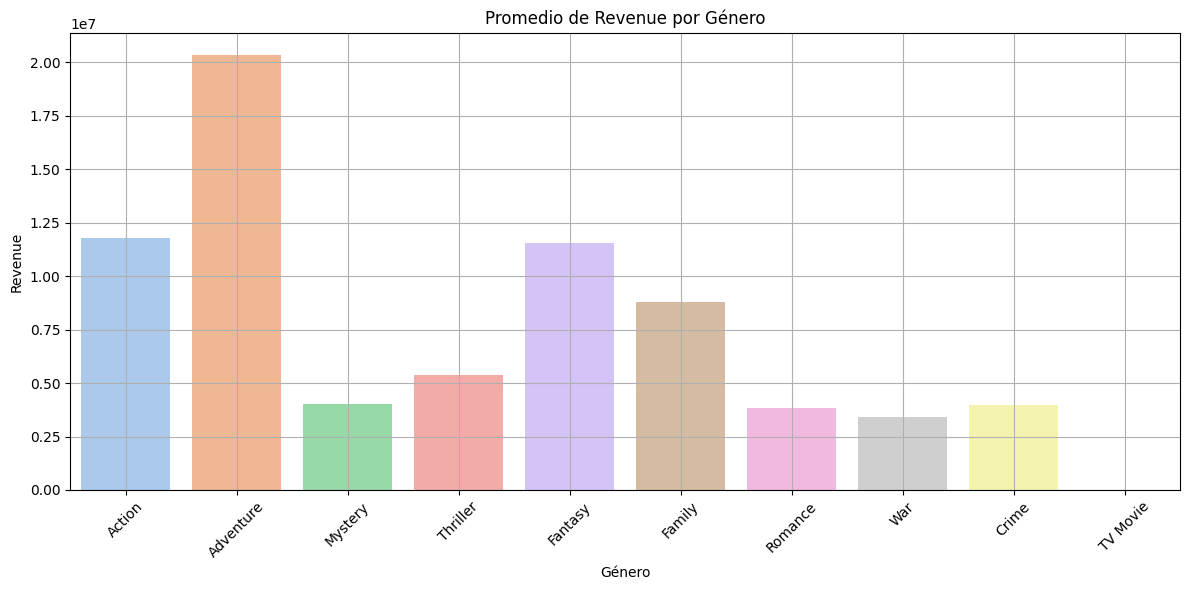

In [21]:
# Gráfico de barras de 'revenue' promedio por género
plt.figure(figsize=(12, 6))

# Verificar índices después de resetear
df_subset = df_genres[['genre', 'revenue']]
df_subset = df_subset.reset_index(drop=True)
sns.barplot(data=df_subset, x='genre', y='revenue', palette='pastel',errorbar=None,legend=False)
plt.title('Promedio de Revenue por Género')
plt.xlabel('Género')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

En el gráfico anterior podemos observar que las valoraciones de la peliculas son mejores cuando las peliculas son del genero de aventura, acción y Ciencia ficción y familiar en dicho orden decreciente.

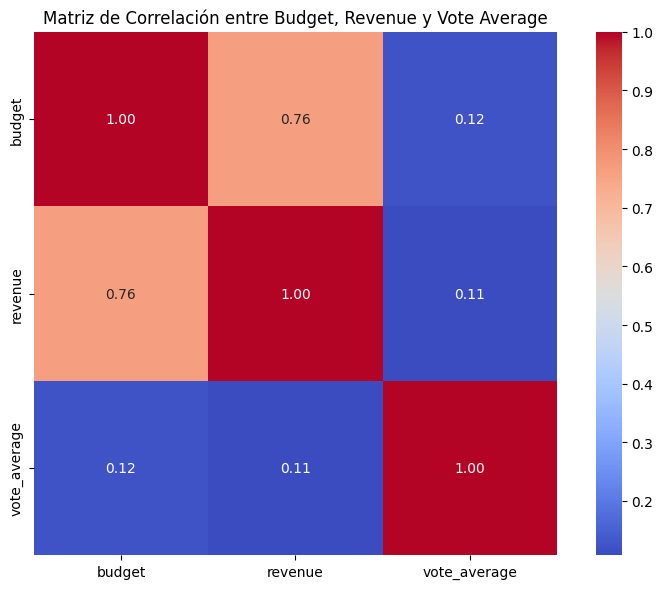

In [22]:
# Heatmap de correlación entre 'budget', 'revenue' y 'vote_average'
plt.figure(figsize=(8, 6))
corr_matrix = df_genres[['budget', 'revenue', 'vote_average']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Matriz de Correlación entre Budget, Revenue y Vote Average')
plt.tight_layout()
plt.show()

En el gráfico anterior podemos observar que las valoraciones no tienen una fuerte correlación con el presupuesto (budget) , en este caso de 0.10 y ganancia(revenue) de 0.09. Aunque si existe una correlación considerable entre el presupuesto invertido con la ganancia obtenida, represantado por un indice de 0.64

1)Con base en las visualizaciones y resúmenes numéricos generados del desafío anterior dar recomendaciones basados en los insights observados.
2)Para esta oportunidad, deberás tener avances en los apartados: Definición de objetivo, Contexto comercial, Contexto analítico, Exploración de datos (EDA)
3)Detallar de qué tipo de aprendizaje estamos hablando y porque. A partir de ello proponer (sin necesidad de ejecutar) posibles modelos de resolución.

Preparar el codigo y probar los resulados con subconjuntos del conjunto original.


# **Limpieza y transformacion de datos**

In [33]:
#Anteriormente habiamos hecho esto
#Quitamos columnas que no utilizamos o que no aportan valor al objetivo del analisis
#Removemos las columnas de poster_path y backdrop_path

#columns_to_drop = ['poster_path', 'backdrop_path']
#df = df.drop(columns=columns_to_drop)

#convertimos el campo release_date a tipo datetime
#df['release_date'] = pd.to_datetime(df['release_date'])

#runtime nulos los reemplazamos por la media para analisis
#media_runtime = df['runtime'].mean()

# Reemplaza los valores nulos con la media
#df['runtime'].fillna(media_runtime, inplace=True)

In [34]:
#Ahora verificamos los valores duplicados
df_genres.duplicated().sum()

17

In [35]:
# Revisamos celdas con valores nulos
df_genres.isnull().sum()

,0
id,0
title,0
original_language,0
overview,10262
popularity,0
production_companies,42570
release_date,4449
budget,0
revenue,0
runtime,0


In [36]:
#Elimino columna title y overview,tagline (que seria el subtitulo de la pelicula) ya que son puramente texto de mucha variacion y no se pueden analizar para predecir las rangos de puntuacion de las votaciones
#Elimino la columna credits ya que los nombres de los actores y personas que participan en la pelicula es muy extensa, habria que hacer un barrido por los principales personas mas importantes de la industria

columns_to_drop = ['title', 'overview', 'tagline','id', 'credits']
df_genres = df_genres.drop(columns=columns_to_drop)


In [37]:
#las columnas de credits (que contiene los actores entre ellos), la columna keywords y production companies pueden resultar de interes debido a la informacion que contienen, al ser texto divido por "-", procedo a separarlos en celdas invididuales siguiendo el mismo procedimiento que en categorias realizado anteriormente
# Dividir por production companies
production_companies_df = df['production_companies'].str.split('-', expand=True).stack().reset_index(level=1, drop=True).rename('production_companies')
df_genres = df_genres.drop('production_companies', axis=1).join(production_companies_df)


In [38]:
#dividir por keywords
keywords_df = df['keywords'].str.split('-', expand=True).stack().reset_index(level=1, drop=True).rename('keywords')
df_genres = df_genres.drop('keywords', axis=1).join(keywords_df)

In [39]:
#ahora vemos como quedo el dataset
df_genres.head()

,original_language,popularity,release_date,budget,revenue,runtime,status,vote_average,vote_count,recommendations,genre,production_companies,keywords
0,en,10484.676,2024-03-27,150000000.0,558503759.0,115.0,Released,7.246,1878.0,1011985-1275232-359410-601796-967847-653346-69...,Action,Legendary Pictures,giant monster
0,en,10484.676,2024-03-27,150000000.0,558503759.0,115.0,Released,7.246,1878.0,1011985-1275232-359410-601796-967847-653346-69...,Action,Legendary Pictures,sequel
0,en,10484.676,2024-03-27,150000000.0,558503759.0,115.0,Released,7.246,1878.0,1011985-1275232-359410-601796-967847-653346-69...,Action,Legendary Pictures,dinosaur
0,en,10484.676,2024-03-27,150000000.0,558503759.0,115.0,Released,7.246,1878.0,1011985-1275232-359410-601796-967847-653346-69...,Action,Legendary Pictures,kaiju
0,en,10484.676,2024-03-27,150000000.0,558503759.0,115.0,Released,7.246,1878.0,1011985-1275232-359410-601796-967847-653346-69...,Action,Legendary Pictures,fantasy world


In [40]:
df_genres.shape

(1149155, 13)

Como celdas de columnas de tipo string no podemos hacer un reemplazo directo de los valores

**Valores outliers**

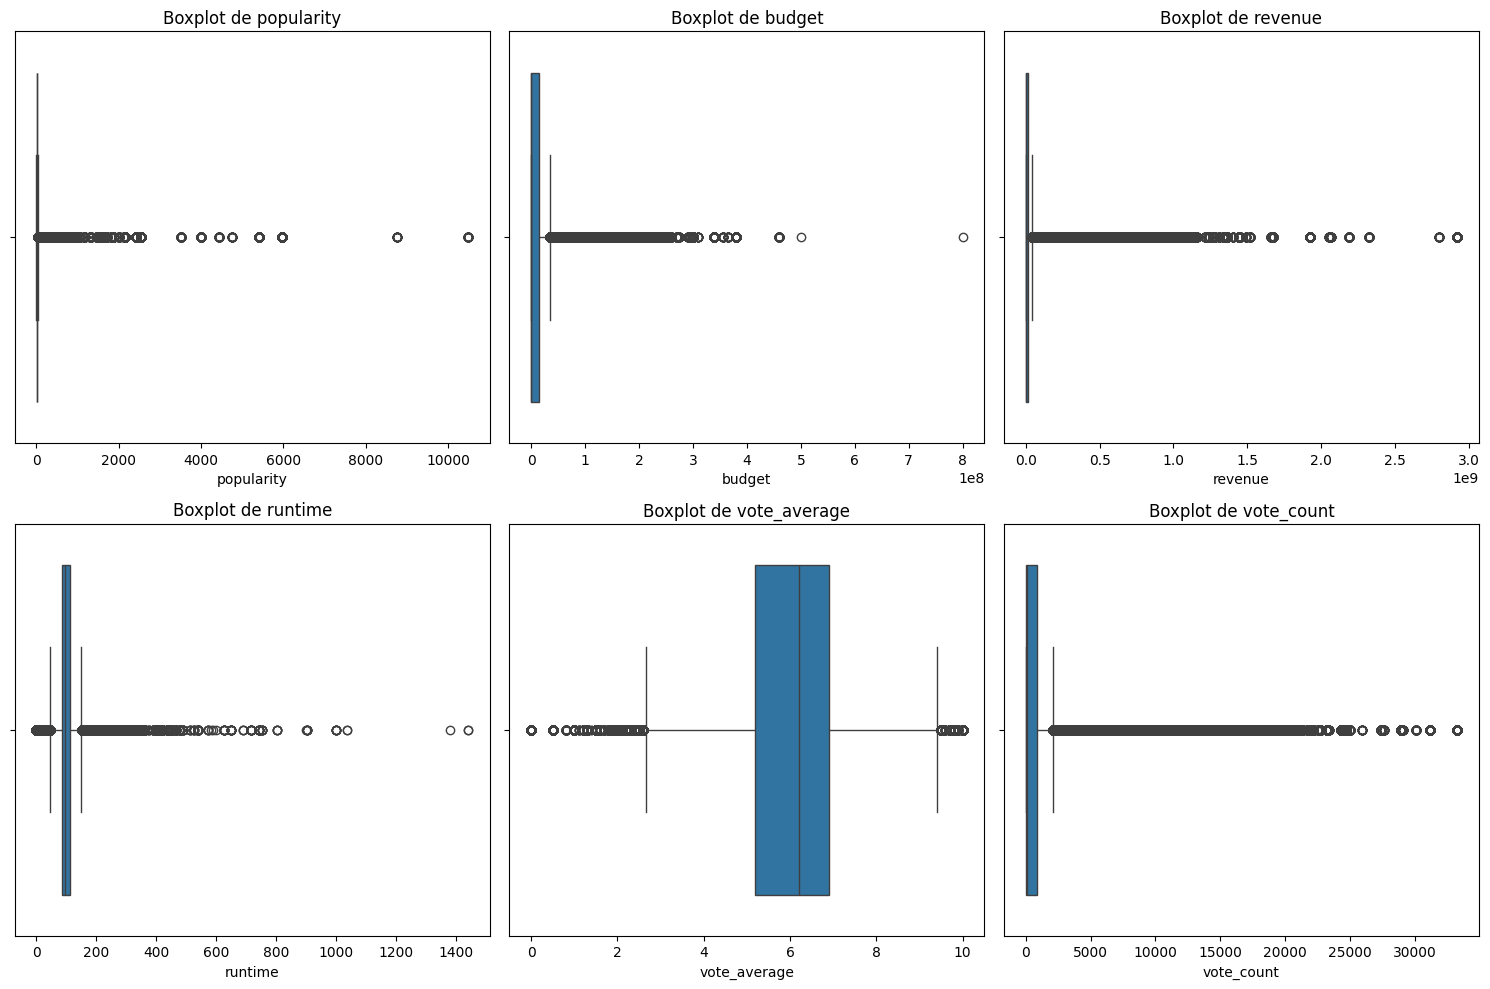

In [41]:
numeric_columns = df_genres.select_dtypes(include=['int64', 'float64'])

# Calcular el número de filas y columnas para los subgráficos
num_vars = len(numeric_columns.columns)
num_rows = (num_vars // 3) + (1 if num_vars % 3 > 0 else 0)
num_cols = min(num_vars, 3)

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 5*num_rows))

# Generar y mostrar los diagramas de caja para cada variable numérica
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(x=df_genres[col])
    plt.title("Boxplot de {}".format(col))
    plt.tight_layout()

plt.show()


*   **Outlayers Popularity:** es una medida subjetiva que depende de varios factores , por lo cual es mejor mantener los outlayers
*   **Outlayers Budget:** existen algunas peliculas con presupuesto exesivamente alto, pero se puede analizar si esto tiene efecto en el vote average.
*   **Outlayers Revenue:** existen algunas peliculas con retorno exesivamente alto, pero se puede analizar si esto tiene efecto en el vote average.
*   **Outlayers Runtime:** al ser la duracion en minutos de las peliculas y ya que es poco comun que existan peliculas de mas de 200 minutos en cines, para fines de estudio podemos recortar las peliculas por arriba de este margen
*   **Vote average:** Son las valoraciones de las peliculas, para fines de estudio podemos dejar los valores outlayers de esta columna
*   **Vote count:** Cantidad de votos, al ser relevado de una pagina de reseñas deberiamos estudiar si mantener esta columna mas adelante ya que puede variar mucho entre peliculas.



In [44]:
# Filtrar el DataFrame para conservar solo las filas donde la duración es menor o igual a 200
df_genres = df_genres[df_genres['runtime'] <= 200]

# Ver las primeras filas del DataFrame filtrado
df_genres.head()

,original_language,popularity,release_date,budget,revenue,runtime,status,vote_average,vote_count,recommendations,genre,production_companies,keywords
0,en,10484.676,2024-03-27,150000000.0,558503759.0,115.0,Released,7.246,1878.0,1011985-1275232-359410-601796-967847-653346-69...,Action,Legendary Pictures,giant monster
0,en,10484.676,2024-03-27,150000000.0,558503759.0,115.0,Released,7.246,1878.0,1011985-1275232-359410-601796-967847-653346-69...,Action,Legendary Pictures,sequel
0,en,10484.676,2024-03-27,150000000.0,558503759.0,115.0,Released,7.246,1878.0,1011985-1275232-359410-601796-967847-653346-69...,Action,Legendary Pictures,dinosaur
0,en,10484.676,2024-03-27,150000000.0,558503759.0,115.0,Released,7.246,1878.0,1011985-1275232-359410-601796-967847-653346-69...,Action,Legendary Pictures,kaiju
0,en,10484.676,2024-03-27,150000000.0,558503759.0,115.0,Released,7.246,1878.0,1011985-1275232-359410-601796-967847-653346-69...,Action,Legendary Pictures,fantasy world


# **Analisis exploratorio de datos**

**Analisis univariado**

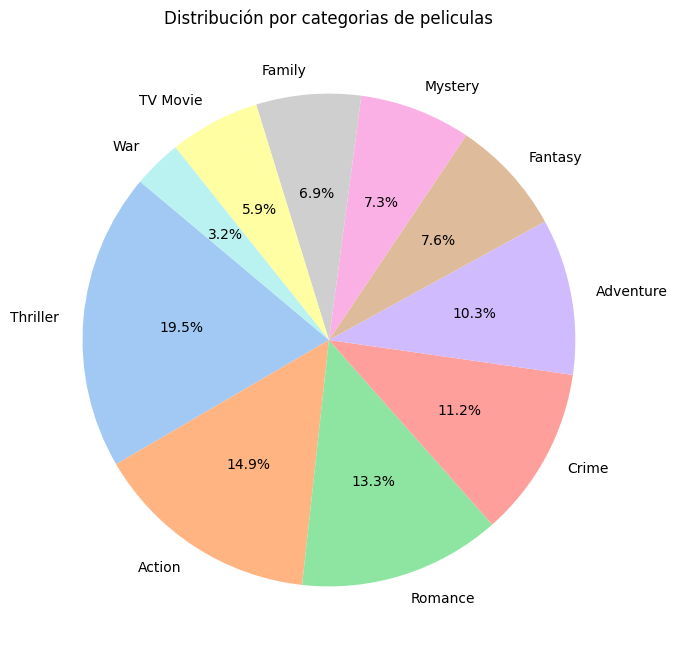

In [47]:
#distribucion segun categorias de peliculas
category_types_counts = df_genres['genre'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_types_counts, labels=category_types_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel", len(category_types_counts)))

plt.title('Distribución por categorias de peliculas')

plt.show()

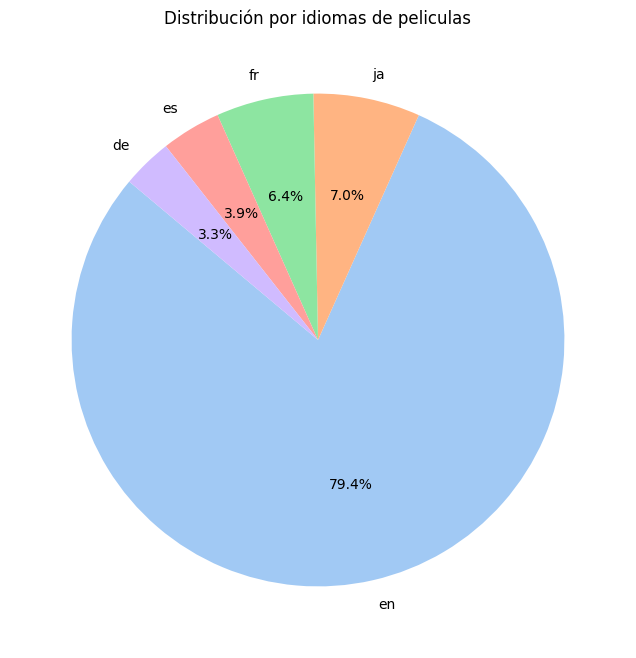

In [48]:
#distribucion segun idiomas de peliculas
language_types_counts = df_genres['original_language'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(language_types_counts, labels=language_types_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel", len(language_types_counts)))

plt.title('Distribución por idiomas de peliculas')

plt.show()

**Analisis bivariado**

<ipython-input-50-062a0165976b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='vote_average', data=df_genres, palette="pastel")


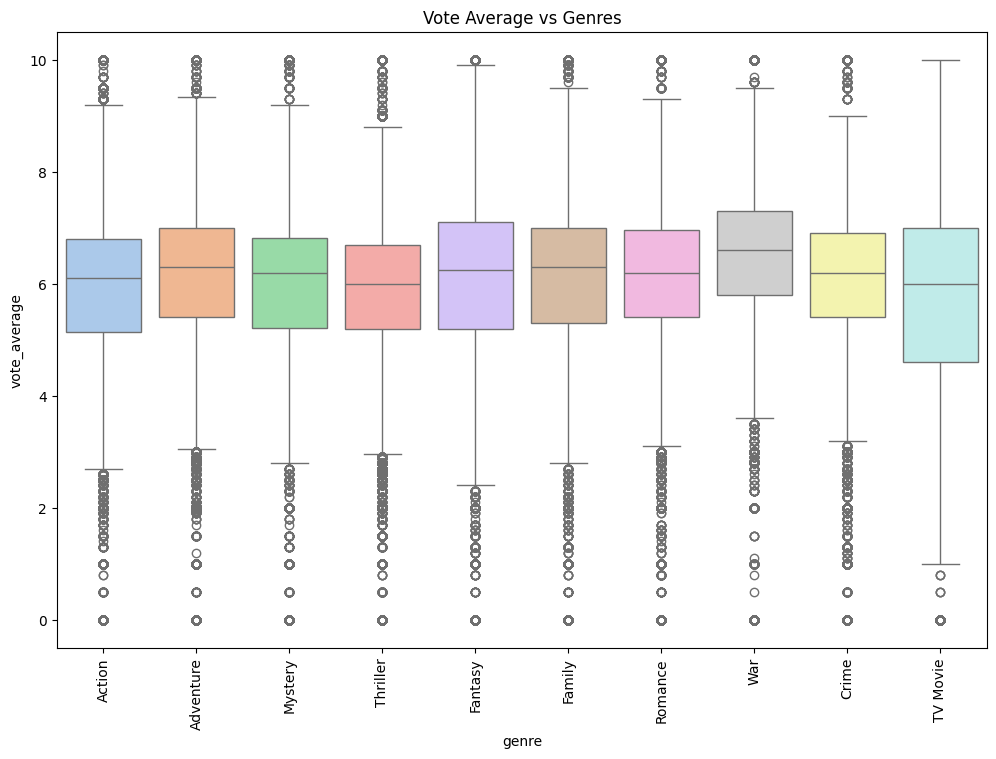

In [50]:
#analsis bivariado entre categorias y puntuacion de los votos
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='vote_average', data=df_genres, palette="pastel")
plt.title('Vote Average vs Genres')
plt.xticks(rotation=90)  # Rotar etiquetas si son muchas categorías
plt.show()

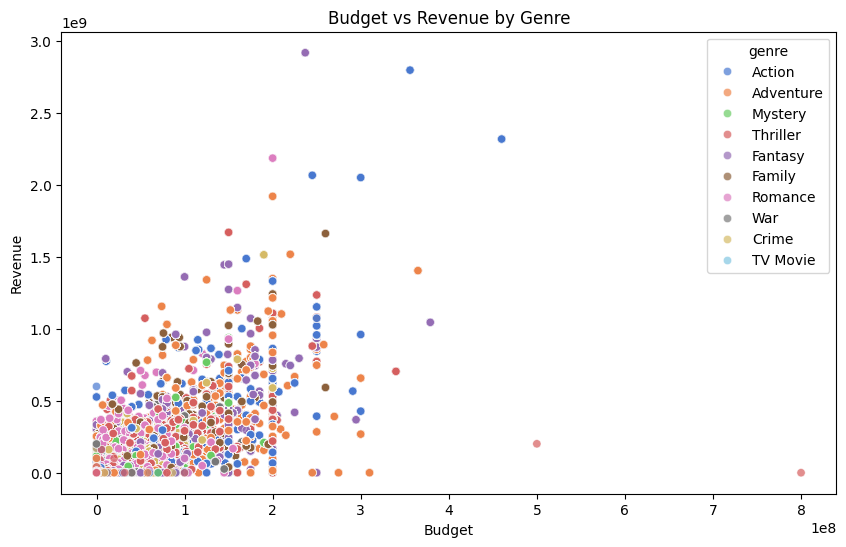

In [51]:
#analsis bivariado entre presupuesto y retorno de inversion de los votos, respecto a las categorias

plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df_genres, hue='genre', palette="muted", alpha=0.7)
plt.title('Budget vs Revenue by Genre')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

**Analsis multivariado**

In [52]:
#primero hago un label encoding de los campos object
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Aplicar label encoding a cada columna de tipo 'object'
for column in df_genres.select_dtypes(include=['object']).columns:
    df_genres[column] = label_encoder.fit_transform(df_genres[column])

# Ver las primeras filas del dataframe con las columnas codificadas
print(df_genres.head())



   original_language  popularity release_date       budget      revenue  \
0                  1   10484.676   2024-03-27  150000000.0  558503759.0   
0                  1   10484.676   2024-03-27  150000000.0  558503759.0   
0                  1   10484.676   2024-03-27  150000000.0  558503759.0   
0                  1   10484.676   2024-03-27  150000000.0  558503759.0   
0                  1   10484.676   2024-03-27  150000000.0  558503759.0   

   runtime  status  vote_average  vote_count  recommendations  genre  \
0    115.0       4         7.246      1878.0              142      0   
0    115.0       4         7.246      1878.0              142      0   
0    115.0       4         7.246      1878.0              142      0   
0    115.0       4         7.246      1878.0              142      0   
0    115.0       4         7.246      1878.0              142      0   

   production_companies  keywords  
0                 22738      9791  
0                 22738     20731  
0       

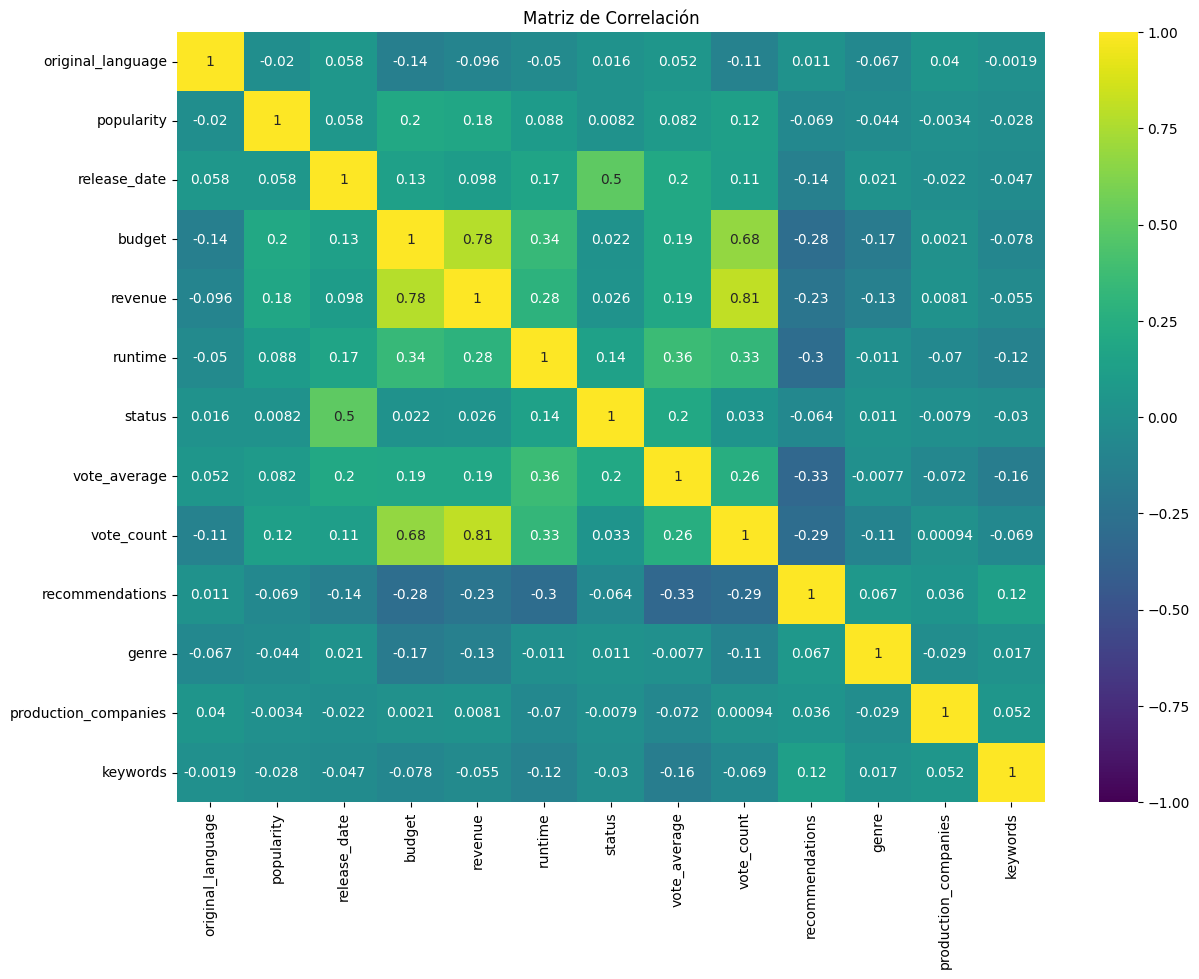

In [53]:
#Ahora obtengo una matriz de correlacion
# Ajustar el tamaño de la figura
plt.figure(figsize=(14, 10))
correlation_matrix = df_genres[df_genres.columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

#**Feature Selection**

In [78]:
X = df_genres.drop(['vote_average','release_date'], axis=1)
y = df['vote_average']
# elimino indicies duplicados
X = X[~X.index.duplicated(keep='first')]
y = y[~y.index.duplicated(keep='first')]
X, y = X.align(y, join='inner', axis=0)
print(X.shape)
print(y.shape)

(119084, 11)
(119084,)


In [79]:
# Variables independientes
X.columns

Index(['original_language', 'popularity', 'budget', 'revenue', 'runtime',
       'status', 'vote_count', 'recommendations', 'genre',
       'production_companies', 'keywords'],
      dtype='object')

In [80]:
# Variable dependiente
y.sample(10)

,vote_average
129471,7.000
86125,0.000
54366,8.000
447600,10.000
313871,5.000
28190,5.300
213882,0.000
293577,5.000
657288,0.000
45498,5.889


# **Modelo de Regresión logistca**

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [82]:
# Defino datos de entrenamiento (70%) y datos de prueba(30%) .
# Random_state:Establece una semilla de múmeros aleatorios que asegura que el código sea reproducible cada vez que lo corra.
# shuffle=True: Mezcla el orden de los datos para evitar sesgos.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [83]:
# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

In [84]:
# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)

In [85]:
# Calcular el MSE y R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error (MSE): 8.06
R^2 Score: 0.15


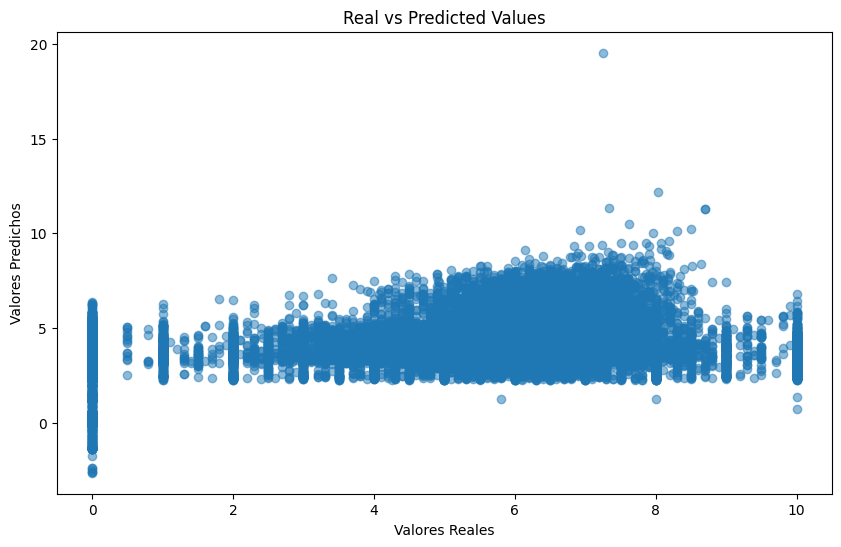



Un R² de 0.15 significa que el modelo explica aproximadamente el 15% de la varianza total de los datos. Esto sugiere que el modelo tiene un poder predictivo limitado y que la mayoría de la varianza en los datos no está siendo capturada por el modelo.

Un MSE de 8.06 significa que, en promedio, el cuadrado de la diferencia entre las predicciones del modelo y los valores reales es 8.06. Cuanto menor sea el MSE, mejor es el modelo, ya que indica que las predicciones están más cerca de los valores reales.

8.06 y R²: 0.15 juntos sugieren que el modelo de regresión lineal no está funcionando muy bien para los datos que tienes. Aunque el MSE no es excesivamente alto, el bajo valor de R² indica que el modelo está explicando solo una pequeña parte de la variabilidad en los datos, lo que sugiere que es posible que necesites mejorar el modelo o explorar otras variables o enfoques (como un modelo no lineal, interacción de variables, o incluir más características relevantes) para obtener mejores predicciones.

Si ahora realizamos el mismo procedimiento del model pero para una regresion polinomica que tal vez se adapte mejor a los datos


In [87]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [88]:
# Supongamos que ya tienes X e y preparados
# X = df_genres.drop(['vote_average'], axis=1)
# y = df['vote_average']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear características polinómicas (por ejemplo, de grado 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Entrenar el modelo de regresión lineal con las características polinómicas
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test_poly)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error (MSE): 7.78
R^2 Score: 0.18


Se redujo el error cuadrado medio a 7.78, el cual resulta aun alto, por lo cual tampoco resulta correcto usar un modelo polinomico.


Ahora probando con random forest

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error (MSE): 1.56
R^2 Score: 0.83


Un R² de 0.83 significa que el 83% de la variabilidad en los datos de y es explicada por el modelo. Esto indica que el modelo tiene un poder predictivo fuerte y que está capturando gran parte de la estructura en los datos.
Este es un resultado excelente, especialmente si se compara con el R² anterior de 0.15, lo que significa que el nuevo modelo es mucho más efectivo para capturar las relaciones en tus datos.

## *Conclusión*


Luego de implemetar varios modelos podemos establecer que el que mas se ajusta es Random Forest Regression, ya que este modelo permite manejar relaciones no lineales y complejas en los datos, por lo cual se ajusta que mejor a los modelos de regresion lineal y polinomica, por la naturaleza variable de los valores del dataset.

Una alternativa es asignar categorias a los valores Y de valoraciones de peliculas, para implementar otro modelo de progresion para variables categorias y verificar si se obtiene un mejor resultado respecto al error cuadratico medio.